In [2]:
# 1. Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

# Load data
df = pd.read_csv("merged_sales_data.csv")
df.dropna(inplace=True)

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")
df.dropna(subset=["Quantity Ordered", "Price Each"], inplace=True)

df["Total Price"] = df["Quantity Ordered"] * df["Price Each"]
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")
df.dropna(subset=["Order Date"], inplace=True)

df["Hour"] = df["Order Date"].dt.hour
df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.day
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1].strip())
df["State"] = df["Purchase Address"].apply(lambda x: x.split(",")[2].split()[0])

features = df[["Product", "Quantity Ordered", "Price Each", "Hour", "Month", "Day", "City", "State"]]
target = df["Total Price"]

features_encoded = pd.get_dummies(features, columns=["Product", "City", "State"])

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

os.makedirs("Results", exist_ok=True)


In [3]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train, y_train)

ann_preds = ann.predict(X_test)
pd.DataFrame(ann_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_ANN_model.csv", index=False)


In [3]:
from sklearn.svm import SVR

# نأخذ فقط أول 5000 عينة من التدريب و 1000 من الاختبار للتجربة
X_train_sample = X_train[:5000]
y_train_sample = y_train[:5000]
X_test_sample = X_test[:1000]

svm = SVR(kernel='linear')
svm.fit(X_train_sample, y_train_sample)

svm_preds = svm.predict(X_test_sample)
pd.DataFrame(svm_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_SVM_model.csv", index=False)


In [4]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)
pd.DataFrame(knn_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_KNN_model.csv", index=False)


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
pd.DataFrame(rf_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_RF_model.csv", index=False)


In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
pd.DataFrame(dt_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_DT_model.csv", index=False)


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
pd.DataFrame(lr_preds, columns=["Predicted_Total_Price"]).to_csv("Results/predictions_LR_model.csv", index=False)


In [8]:
from sklearn.naive_bayes import GaussianNB

# تحويل القيم إلى فئات تصنيفية
def classify_price(value):
    if value < 100:
        return 'Low'
    elif value <= 500:
        return 'Medium'
    else:
        return 'High'

y_train_class = y_train.apply(classify_price)
y_test_class = y_test.apply(classify_price)

nb = GaussianNB()
nb.fit(X_train, y_train_class)

nb_preds = nb.predict(X_test)
pd.DataFrame(nb_preds, columns=["Predicted_Class"]).to_csv("Results/predictions_NB_model.csv", index=False)


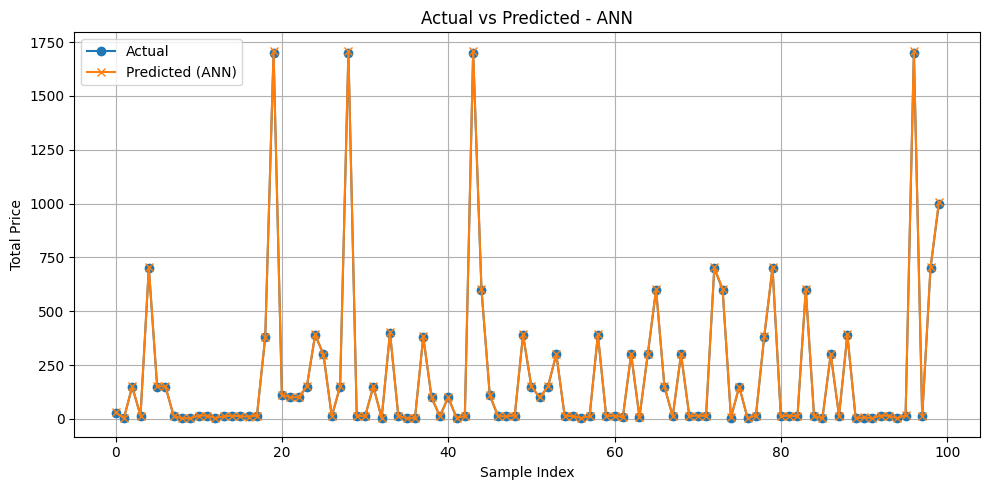

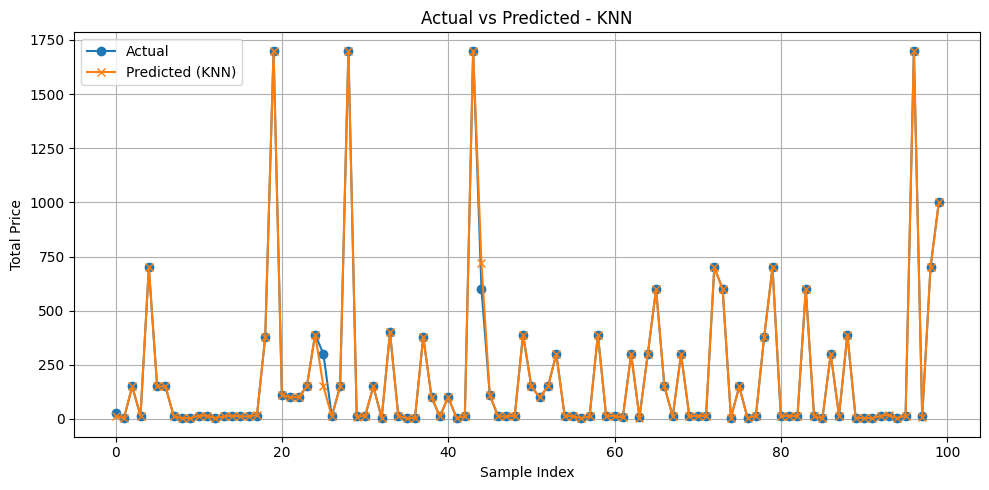

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# تحميل البيانات الحقيقية والتوقعات
y_test = pd.read_csv('Y_test.csv').squeeze()
ann_preds = pd.read_csv('Results/predictions_ANN_model.csv')['Predicted_Total_Price']
knn_preds = pd.read_csv('Results/predictions_KNN_model.csv')['Predicted_Total_Price']

# نأخذ أول 100 عينة فقط للتوضيح
y_sample = y_test.iloc[:100].reset_index(drop=True)
ann_sample = ann_preds.iloc[:100].reset_index(drop=True)
knn_sample = knn_preds.iloc[:100].reset_index(drop=True)

# رسم ANN
plt.figure(figsize=(10, 5))
plt.plot(y_sample, label='Actual', marker='o')
plt.plot(ann_sample, label='Predicted (ANN)', marker='x')
plt.title('Actual vs Predicted - ANN')
plt.xlabel('Sample Index')
plt.ylabel('Total Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# رسم KNN
plt.figure(figsize=(10, 5))
plt.plot(y_sample, label='Actual', marker='o')
plt.plot(knn_sample, label='Predicted (KNN)', marker='x')
plt.title('Actual vs Predicted - KNN')
plt.xlabel('Sample Index')
plt.ylabel('Total Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
